In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
#load the data
datatrain=pd.read_csv('train_indessa.csv')
datatrain.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [3]:
#load the data
datatest=pd.read_csv('test_indessa.csv')
datatest.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


In [4]:
datatrain.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [5]:
datatest.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

In [6]:
# Understanding the data
datatrain.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [7]:
datatest.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [8]:
datatrain.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [9]:
datatest.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [10]:
datatrain.shape

(532428, 45)

In [11]:
datatest.shape

(354951, 44)

In [12]:
datatrain['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

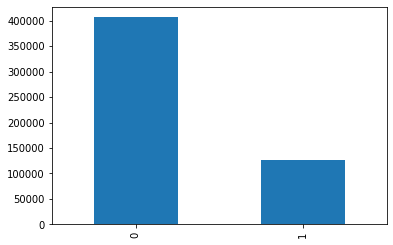

In [13]:
datatrain['loan_status'].value_counts().plot.bar()

In [14]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

In [15]:
datatrain.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [16]:
datatest.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.549510e+05,354951.000000,354951.000000,354951.000000,354951.000000,3.549500e+05,354951.000000,354938.000000,354938.000000,173193.000000,...,354951.000000,354951.000000,354951.000000,354951.000000,354901.00000,88723.000000,354938.000000,3.266790e+05,3.266790e+05,3.266790e+05
mean,3.499635e+07,14751.767920,14738.287116,14698.770903,13.252396,7.502420e+04,18.184447,0.314432,0.694654,34.075898,...,1756.867641,0.399299,46.221362,4.913062,0.01450,44.079923,0.004956,2.439283e+02,1.393142e+05,3.205068e+04
std,2.410120e+07,8437.019324,8431.045701,8443.341658,4.385250,6.393870e+04,25.174050,0.865533,1.000579,21.885212,...,2098.587607,4.082242,409.763865,63.128236,0.13595,22.152081,0.075333,1.613022e+04,1.535022e+05,3.664969e+04
min,7.062600e+04,500.000000,500.000000,0.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.088941e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.890000,0.000000,0.000000,15.000000,...,441.345000,0.000000,0.000000,0.000000,0.00000,27.000000,0.000000,0.000000e+00,2.987350e+04,1.390000e+04
50%,3.708650e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,1074.120000,0.000000,0.000000,0.000000,0.00000,44.000000,0.000000,0.000000e+00,8.036900e+04,2.370000e+04
75%,5.844892e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,...,2243.075000,0.000000,0.000000,0.000000,0.00000,61.000000,0.000000,0.000000e+00,2.078005e+05,3.970000e+04
max,7.354483e+07,35000.000000,35000.000000,35000.000000,28.990000,9.000000e+06,9999.000000,39.000000,33.000000,188.000000,...,23062.450000,286.747566,29282.070000,5569.920000,20.00000,188.000000,5.000000,9.152545e+06,4.447397e+06,9.999999e+06


In [17]:
# Convert the datatype to numeric.
datatrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
datatest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
datatrain['term'] = pd.to_numeric(datatrain['term'], errors='coerce')
datatest['term'] = pd.to_numeric(datatest['term'], errors='coerce')

In [18]:
datatrain['emp_length'].replace('n/a', '0', inplace=True)
datatrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
datatrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
datatrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
datatrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
datatest['emp_length'].replace('n/a', '0', inplace=True)
datatest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
datatest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
datatest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
datatest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
datatrain['emp_length'] = pd.to_numeric(datatrain['emp_length'], errors='coerce')
datatest['emp_length'] = pd.to_numeric(datatest['emp_length'], errors='coerce')

In [19]:
datatrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
datatest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
datatrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
datatest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
datatrain['last_week_pay'] = pd.to_numeric(datatrain['last_week_pay'], errors='coerce')
datatest['last_week_pay'] = pd.to_numeric(datatest['last_week_pay'], errors='coerce')

In [20]:
print(f"GRADE unique: {datatrain.grade.unique()}")
print(f"SUB_GRADE unique: {datatrain.sub_grade.unique()}")

GRADE unique: ['E' 'B' 'A' 'D' 'C' 'F' 'G']
SUB_GRADE unique: ['E3' 'B4' 'A4' 'D5' 'B2' 'A5' 'B1' 'C4' 'D4' 'C3' 'D2' 'A3' 'A1' 'C1'
 'D1' 'E2' 'B3' 'A2' 'C2' 'C5' 'E4' 'D3' 'B5' 'F2' 'F5' 'E1' 'E5' 'F4'
 'F1' 'F3' 'G4' 'G3' 'G5' 'G1' 'G2']


In [21]:
datatrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
datatrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
datatrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
datatrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
datatrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
datatrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
datatrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
datatest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
datatest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
datatest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
datatest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
datatest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
datatest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
datatest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
datatrain['sub_grade'] = pd.to_numeric(datatrain['sub_grade'], errors='coerce')
datatest['sub_grade'] = pd.to_numeric(datatest['sub_grade'], errors='coerce')

In [22]:
# Missing values
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    datatrain[col].fillna(datatrain[col].median(), inplace=True)
    datatest[col].fillna(datatest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    datatrain[col].fillna(0, inplace=True)
    datatest[col].fillna(0, inplace=True)

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med


In [23]:
#cat_attr = ['home_ownership', 'purpose']
#for cat in cat_attr:
#    print('Categorizing: %s...' % (cat))
#    data_col = [cat]
#    datatrain[cat] = datatrain[cat].astype("category")
#    datatrain[cat] = pd.get_dummies(datatrain, columns=data_col)
#    datatest[cat] = datatest[cat].astype("category")
#    datatest[cat] = pd.get_dummies(datatest, columns=data_col)

In [24]:
# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(datatest['member_id'])


In [25]:
# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(datatrain['loan_status'])

In [26]:
# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = datatrain[selected_cols]
finalTest = datatest[selected_cols]

In [27]:
# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']

In [28]:
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])

In [29]:
# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1

In [30]:
# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']

In [31]:
# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']

In [32]:
# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)

In [33]:
# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100) + ((finalTest['recoveries']/finalTest['funded_amnt_inv']) * 100)

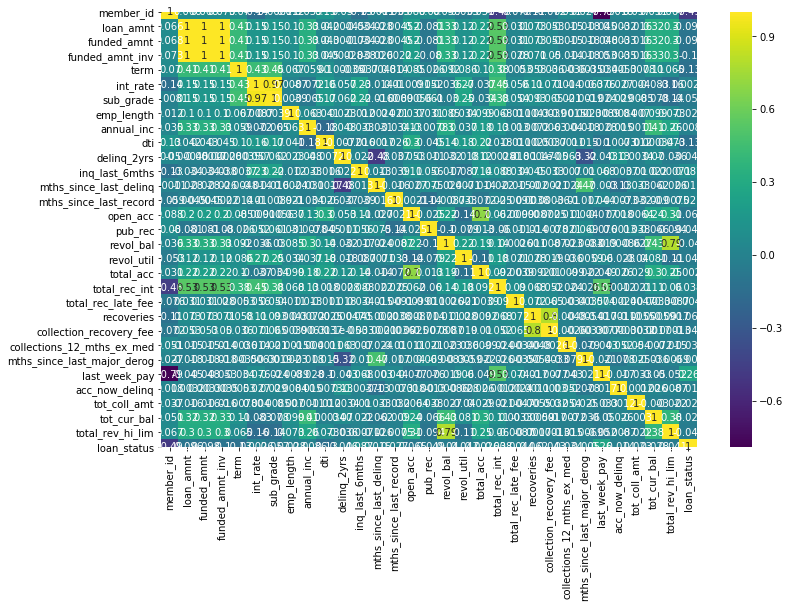

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(datatrain.corr(), annot=True, cmap='viridis')

In [35]:
# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [36]:
import xgboost
clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)


[0]	validation_0-auc:0.969493
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.969842
[2]	validation_0-auc:0.970292
[3]	validation_0-auc:0.970733
[4]	validation_0-auc:0.971114
[5]	validation_0-auc:0.971314
[6]	validation_0-auc:0.97143
[7]	validation_0-auc:0.971598
[8]	validation_0-auc:0.971893
[9]	validation_0-auc:0.972018
[10]	validation_0-auc:0.972249
[11]	validation_0-auc:0.972316
[12]	validation_0-auc:0.972442
[13]	validation_0-auc:0.972607
[14]	validation_0-auc:0.97268
[15]	validation_0-auc:0.972708
[16]	validation_0-auc:0.972769
[17]	validation_0-auc:0.972881
[18]	validation_0-auc:0.972949
[19]	validation_0-auc:0.972967
[20]	validation_0-auc:0.973049
[21]	validation_0-auc:0.97308
[22]	validation_0-auc:0.973103
[23]	validation_0-auc:0.973149
[24]	validation_0-auc:0.973198
[25]	validation_0-auc:0.973228
[26]	validation_0-auc:0.973269
[27]	validation_0-auc:0.97331
[28]	validation_0-auc:0.973349
[29]	validation_0-auc:0.973375
[30]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10,
              learning_rate=0.05, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=9616,
              silent=None, subsample=1, verbosity=1)

In [37]:
y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

In [38]:
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'


Accuracy: 94.1375705101%


In [39]:
accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))


ROC-AUC: 92.4249861201%


In [40]:
final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_member_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

[0.10266165 0.00476205 0.0052993  0.00428697 0.00455664 0.00868205
 0.00714697 0.0051345  0.00612743 0.00426486 0.00411465 0.00460514
 0.0046081  0.00516671 0.00463142 0.00559494 0.00978428 0.00398726
 0.10910694 0.0056129  0.00516013 0.0038455  0.51997745 0.
 0.06463049 0.00653418 0.01848729 0.00680758 0.02209712 0.00487742
 0.00681435 0.02122104 0.00941275]
0 member_id
1 emp_length
2 loan_amnt
3 funded_amnt
4 funded_amnt_inv
5 sub_grade
6 int_rate
7 annual_inc
8 dti
9 mths_since_last_delinq
10 mths_since_last_record
11 open_acc
12 revol_bal
13 revol_util
14 total_acc
15 total_rec_int
16 total_rec_late_fee
17 mths_since_last_major_derog
18 last_week_pay
19 tot_cur_bal
20 total_rev_hi_lim
21 tot_coll_amt
22 recoveries
23 collection_recovery_fee
24 term
25 acc_now_delinq
26 collections_12_mths_ex_med
27 loan_to_income
28 bad_state
29 avl_lines
30 int_paid
31 emi_paid_progress_perc
32 total_repayment_progress


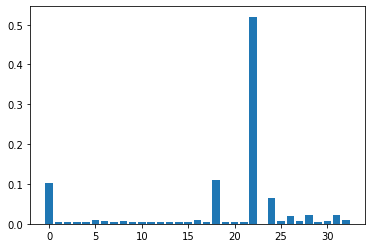

In [41]:
import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()